In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontManager
from matplotlib.pyplot import imshow
from PIL import ImageFont

import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.kps import Keypoint, KeypointsOnImage

from sudoku_generator import SudokuGenerator

%matplotlib inline
%load_ext autoreload
%autoreload 2

(32, 500, 500, 3) (32, 8)


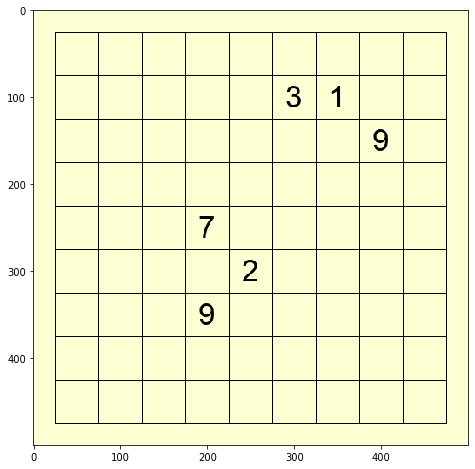

In [23]:
data = []
sudoku_dim = (500, 500)
gen = SudokuGenerator(dim=sudoku_dim).generate_batch(augment=True)

img_list, corners = next(gen)
print(img_list.shape, corners.shape)
plt.figure(figsize=(8, 8))
imshow(img_list[0])
plt.show()

In [66]:
from keras.models import Model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Flatten
from keras.optimizers import Adam

img = Input(shape=(sudoku_dim[0], sudoku_dim[1], 3), name='img')
x = Conv2D(filters=16, kernel_size=3)(img)
x = MaxPooling2D()(x)
x = Conv2D(filters=16, kernel_size=5, strides=(2,2))(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
# x = Dense(32)(x)
output = Dense(8, activation='linear')(x)
model = Model(inputs=img, outputs=output)

optimizer = Adam(lr=0.001, decay=0.99)

model.compile(optimizer='adam', 
              loss='mae',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             (None, 500, 500, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 498, 498, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 249, 249, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 123, 123, 16)      6416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 61, 61, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 59536)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 476296    
Total para

In [67]:
model.fit_generator(gen, steps_per_epoch=100, epochs=10)

Epoch 1/10
100/100 [==============================] - 158s 2s/step - loss: 287.5198 - acc: 0.2419
Epoch 2/10
100/100 [==============================] - 159s 2s/step - loss: 26.1260 - acc: 0.3450
Epoch 3/10
100/100 [==============================] - 156s 2s/step - loss: 27.5001 - acc: 0.2987
Epoch 4/10
100/100 [==============================] - 156s 2s/step - loss: 24.1315 - acc: 0.3675
Epoch 5/10
100/100 [==============================] - 155s 2s/step - loss: 21.8439 - acc: 0.3484
Epoch 6/10
100/100 [==============================] - 156s 2s/step - loss: 19.8404 - acc: 0.3631
Epoch 7/10
100/100 [==============================] - 155s 2s/step - loss: 15.4801 - acc: 0.3994
Epoch 8/10
100/100 [==============================] - 155s 2s/step - loss: 15.1576 - acc: 0.4009
Epoch 9/10
100/100 [==============================] - 155s 2s/step - loss: 15.6971 - acc: 0.3794
Epoch 10/10
 41/100 [===========>..................] - ETA: 1:32 - loss: 16.3275 - acc: 0.3895

KeyboardInterrupt: 

(32, 500, 500, 3) (32, 8)


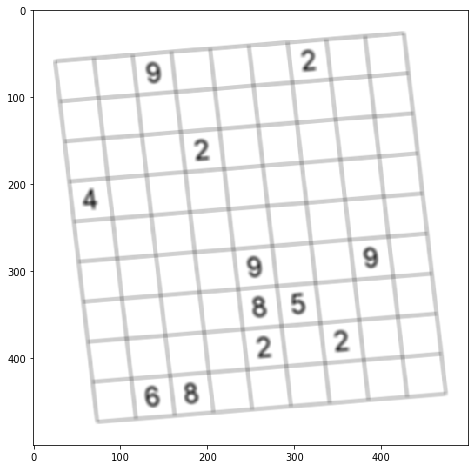

In [28]:
data = []
sudoku_dim = (500, 500)
gen = SudokuGenerator(dim=sudoku_dim).generate_batch(augment=True)

img_list, corners = next(gen)
print(img_list.shape, corners.shape)
plt.figure(figsize=(8, 8))
imshow(img_list[0])
plt.show()

In [29]:
from imgaug.augmentables import Keypoint, KeypointsOnImage

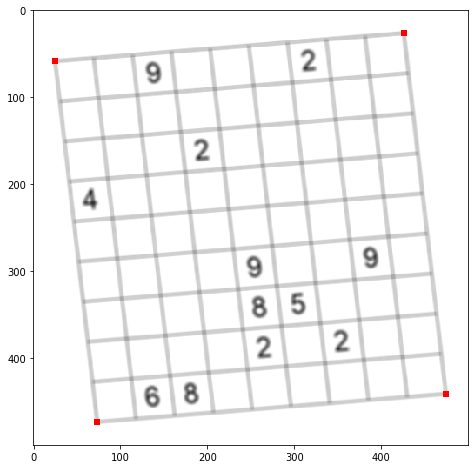

In [53]:
i = 0
kps = KeypointsOnImage([Keypoint(x=c[0], y=c[1])
                        for c in corners[i].reshape(4, 2)], shape=sudoku_dim)
plt.figure(figsize=(8,8))
imshow(kps.draw_on_image(img_list[i], color=(255,0,0), size=7))
plt.show()

In [55]:
preds = model.predict(img_list)

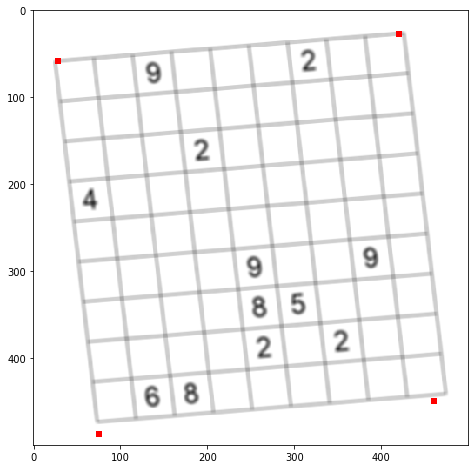

In [57]:
i = 0
kps = KeypointsOnImage([Keypoint(x=c[0], y=c[1])
                        for c in preds[i].reshape(4, 2)], shape=sudoku_dim)
plt.figure(figsize=(8,8))
imshow(kps.draw_on_image(img_list[i], color=(255,0,0), size=7))
plt.show()

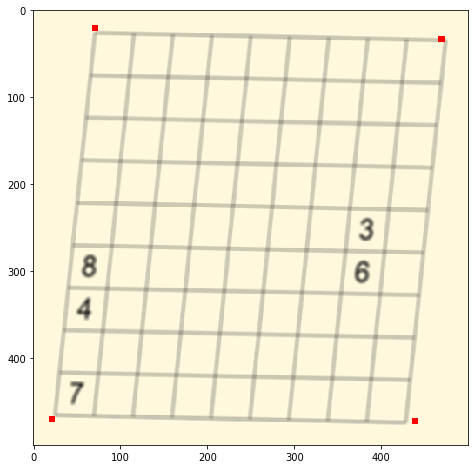

In [64]:
i = 7
kps = KeypointsOnImage([Keypoint(x=c[0], y=c[1])
                        for c in preds[i].reshape(4, 2)], shape=sudoku_dim)
plt.figure(figsize=(8,8))
imshow(kps.draw_on_image(img_list[i], color=(255,0,0), size=7))
plt.show()